In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 02 - Getting Data

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

# 03 - Cleaning/Wrangling/EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#get unique values of all columns
for i in data.select_dtypes(np.object).columns:
    print(data[i].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Co

In [5]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())

In [6]:
#standardize header names
data.columns = cols
data.columns = [e.lower().replace(' ','_')for e in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Check NaN, Drop Columns

In [7]:
#After 1st iteration, identified columns that were unneccessary for the model - drop columns
#customer, effective_to_date
data = data.drop(['customer','effective_to_date'],axis=1)
data.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
#Check NaN values & Deal if necessary
data.isna().sum() #check the sum of all NaN
round(data.isna().sum()/len(data),4)*100 #show percentage of null values in a column
#no significant columns or rows to drop - no null values to replace
#zero income are valid due to unemployment, do not replace with values at this point

state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Categorical & Numerical Features

In [9]:
#Categorical Features
categorical = data.select_dtypes(np.object)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [10]:
#Numerical Features
numerical = data.select_dtypes(np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


# Numerical Exploration

In [11]:
#all variables
#sns.pairplot(numerical);

In [12]:
#Numerical: distribution plots
#for x in numerical.columns:
#    sns.displot(numerical[x])

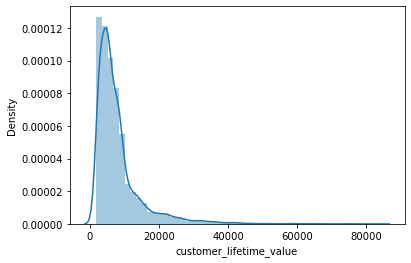

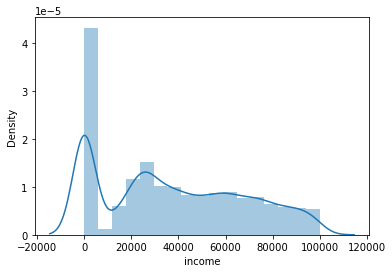

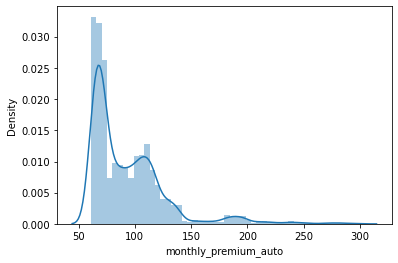

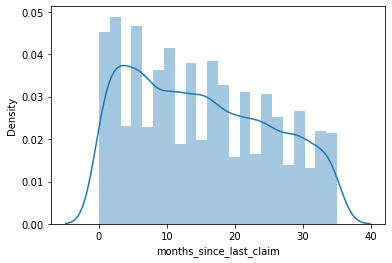

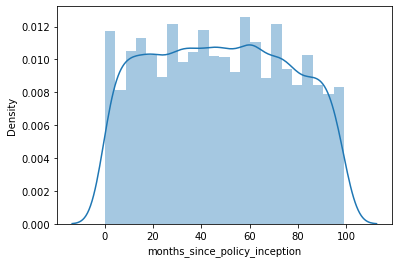

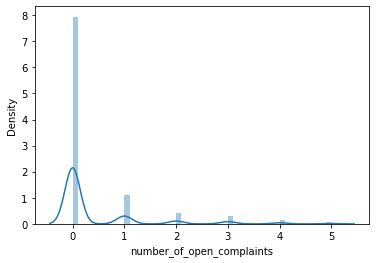

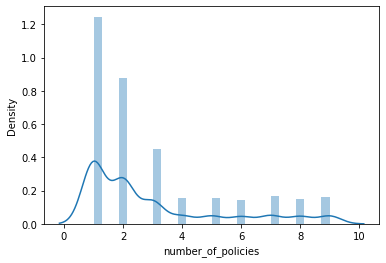

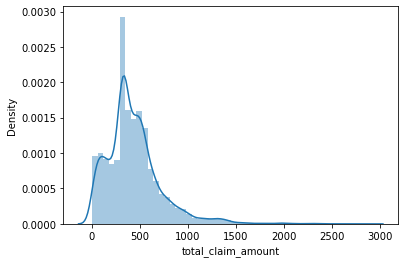

In [13]:
#Numerical: distribution plots
col_num=list(numerical.columns)
for cols in col_num:
    sns.distplot(numerical[cols].astype(float))
    plt.show()

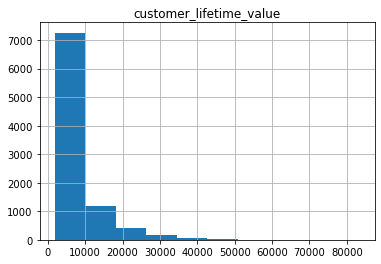

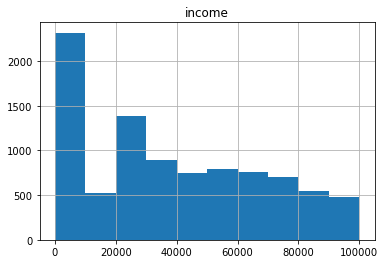

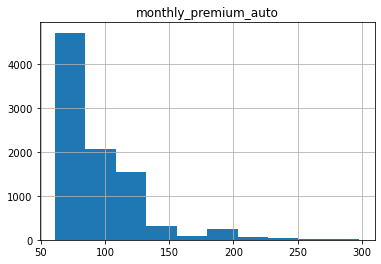

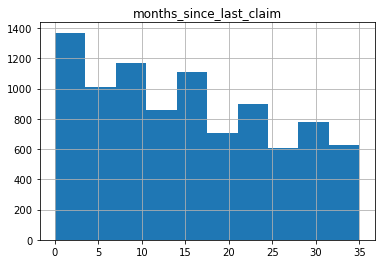

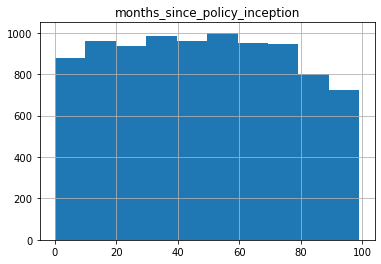

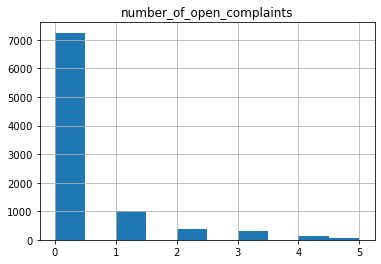

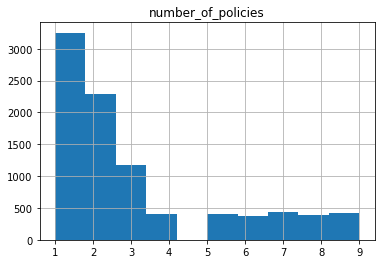

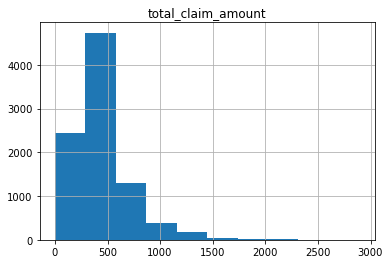

In [14]:
#Numerical: histograms
for x in numerical.columns:
    numerical.hist(x)
plt.show()

In [15]:
#check customer_lifetime_value
data.describe()['customer_lifetime_value']

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [16]:
#check income
data.describe()['income']

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [17]:
#review income
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25)
upper_limit = np.percentile(data['income'],75) + 1.5*iqr
lower_limit = np.percentile(data['income'],25) - 1.5*iqr

In [18]:
data = data[(data['income']>lower_limit) & (data['income']<upper_limit)]

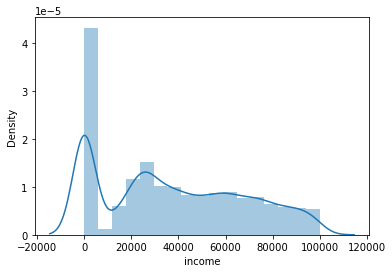

In [19]:
sns.distplot(data['income'])
plt.show()

# Categorical Exploration

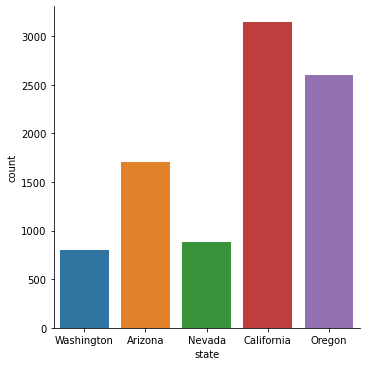

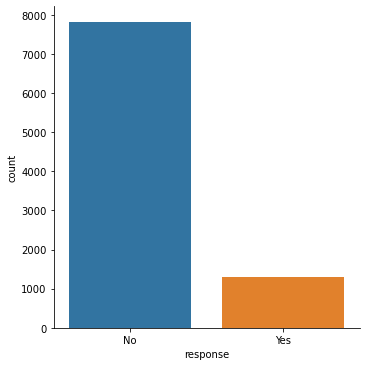

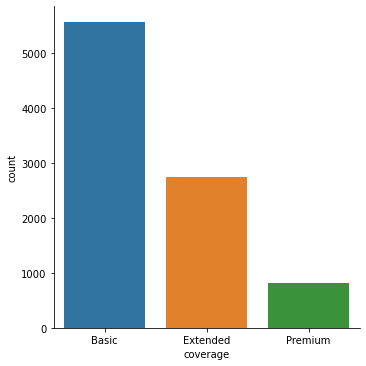

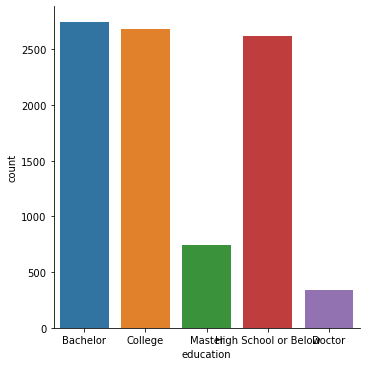

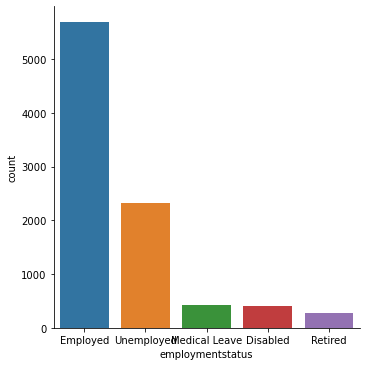

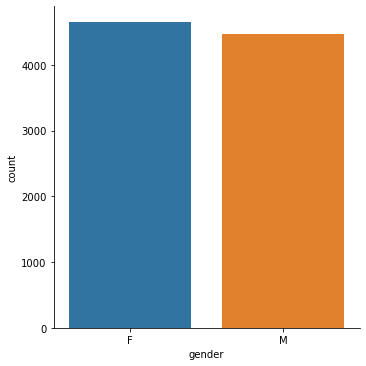

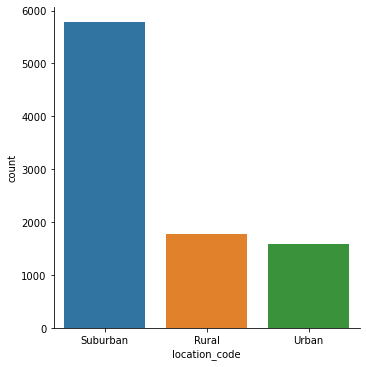

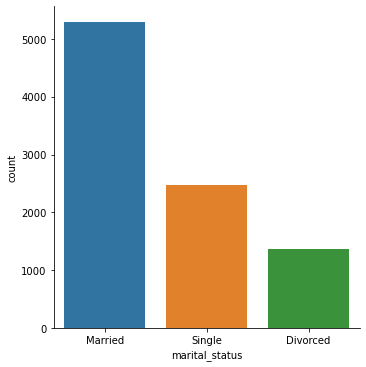

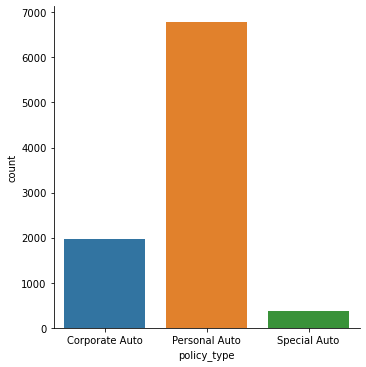

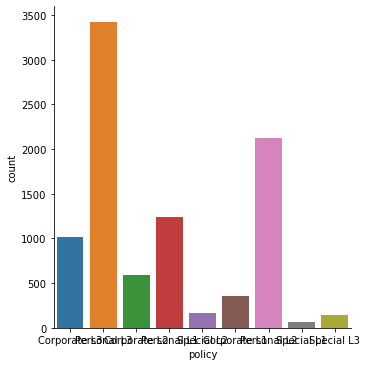

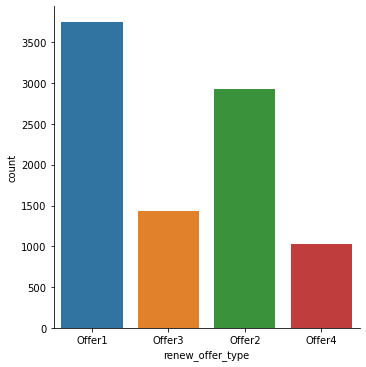

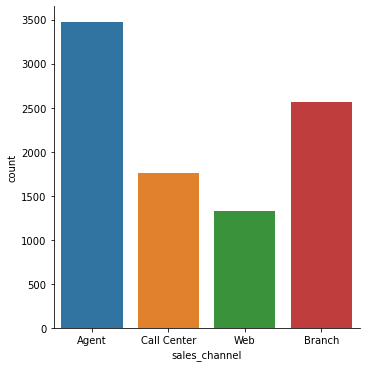

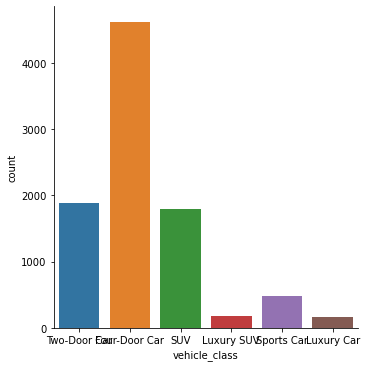

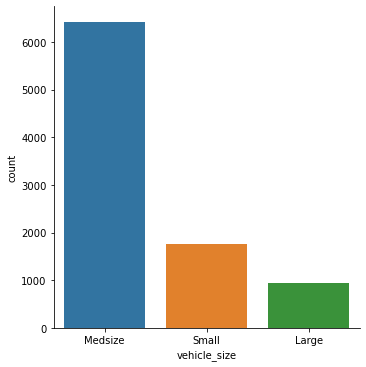

In [20]:
#Categorical Exploration
col_cat=list(categorical.columns)

for cos in categorical.columns:
    sns.catplot(x = cos, kind = "count", data = categorical)
    plt.show()

# Check Correlation

In [21]:
#Numerical: Heatmap feature
#correlations_matrix = data.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(10, 8))
#ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
#plt.show() 
#any high correlations over 0.9 to drop > nothing to drop

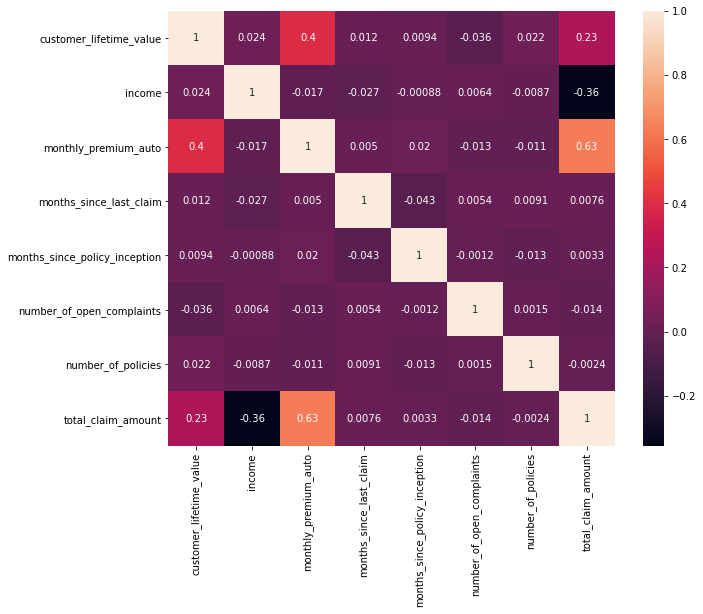

In [22]:
#Correlation matrix - formatted for easier viewing
pear = numerical.corr()
fig_ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(pear, annot=True)
plt.show()

# 04 - Processing Data

# Outliers

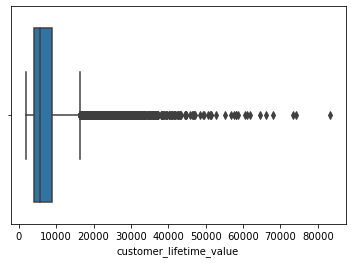

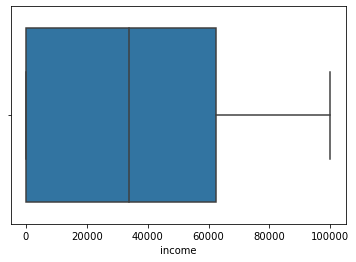

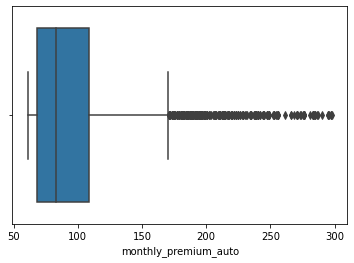

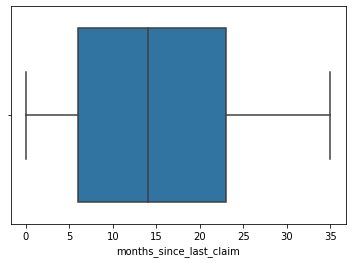

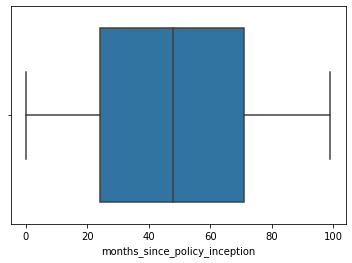

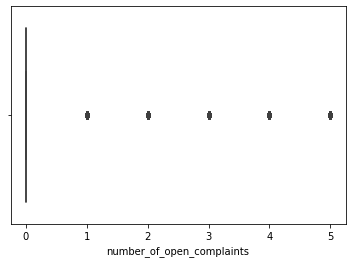

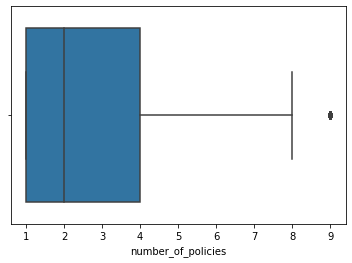

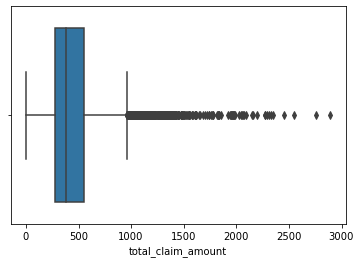

In [23]:
#check for outliers: box-plot - numerical data 
for cols in col_num:
    ax = sns.boxplot(x=numerical[cols])
    plt.show()

In [24]:
col_num=list(numerical.columns)
for cols in col_num:
    q1 = np.quantile(numerical[cols],0.25)
    q3 = np.quantile(numerical[cols],0.75)
    out_high = q3+1.5*(q3-q1)
    out_low = q1-1.5*(q3-q1)
        
    out_l = data[(numerical[cols] < out_low) | (numerical[cols] > out_high)].index
    print("Number of outliers of", cols,':', len(out_l))

Number of outliers of customer_lifetime_value : 817
Number of outliers of income : 0
Number of outliers of monthly_premium_auto : 430
Number of outliers of months_since_last_claim : 0
Number of outliers of months_since_policy_inception : 0
Number of outliers of number_of_open_complaints : 1882
Number of outliers of number_of_policies : 416
Number of outliers of total_claim_amount : 453


# Log Transformations for income

In [25]:
#transform 

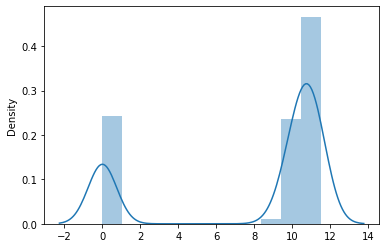

In [26]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  
inc_log = list(map(log_transfom_clean, data['income']))
sns.distplot(inc_log)
plt.show()

In [27]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # returning NaNs so that we can replace them with means later   
data['inc_log'] = list(map(log_transfom_clean_, data['income']))

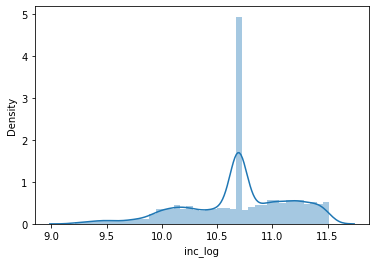

In [28]:
data['inc_log'] = data['inc_log'].fillna(np.mean(data['inc_log']))
sns.distplot(data['inc_log'])
plt.show()

In [29]:
data = data.drop(['income'], axis=1)
data.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,inc_log
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,10.937988
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,10.694229
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,10.794809
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,10.694229
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,10.688211


# X-Y Split

In [30]:
y = data['total_claim_amount']
x = data.drop(['total_claim_amount'], axis=1)


In [31]:
x_num = data.select_dtypes(include = np.number)
x_cat = data.select_dtypes(include = np.object)

# Normalization

column : customer_lifetime_value
skew : 3.0317822713278852
kurtosis : 13.815310695287444


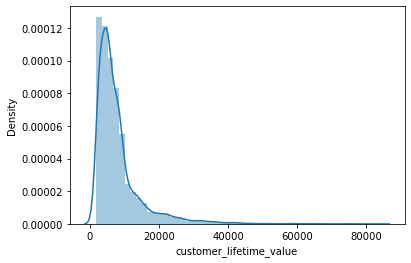

column : monthly_premium_auto
skew : 2.123197701864424
kurtosis : 6.189558258832852


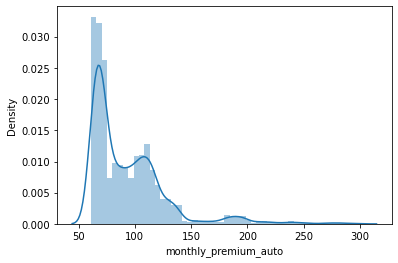

column : months_since_last_claim
skew : 0.2785405598366762
kurtosis : -1.0737368448075961


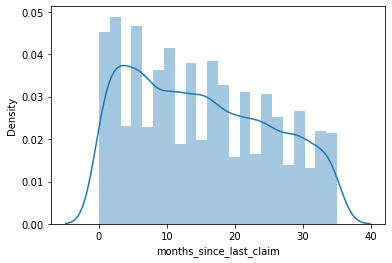

column : months_since_policy_inception
skew : 0.040158365343045704
kurtosis : -1.1330825805856537


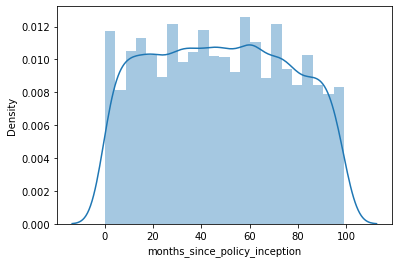

column : number_of_open_complaints
skew : 2.7828059596647505
kurtosis : 7.744410297233042


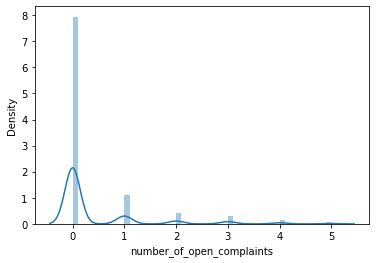

column : number_of_policies
skew : 1.2531269015899718
kurtosis : 0.36230101435395934


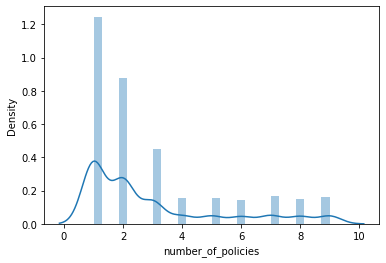

column : total_claim_amount
skew : 1.7146841624611302
kurtosis : 5.975471577225969


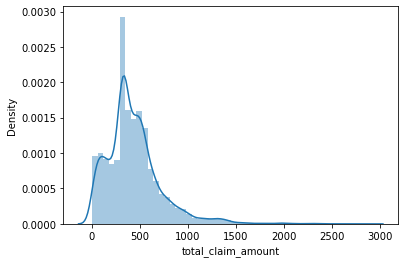

column : inc_log
skew : -0.5214216703531671
kurtosis : 0.08377622466462142


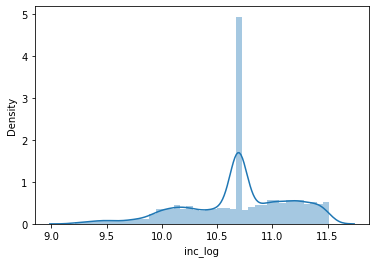

In [32]:
#check for normality
from scipy.stats import skew, kurtosis
colx=list(x_num.columns)

for i in colx:
    print('column :', i)
    print('skew : {}'.format(skew(x_num[i])))
    print('kurtosis : {}'.format(kurtosis(x_num[i])))
    sns.distplot(x_num[i])
    plt.show()

In [33]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
print(x_normalized.shape)

(9134, 8)


In [34]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(x_num)
x_standardized = transformer.transform(x_num)
print(x_standardized.shape)

(9134, 8)


In [35]:
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6,7
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792
...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323


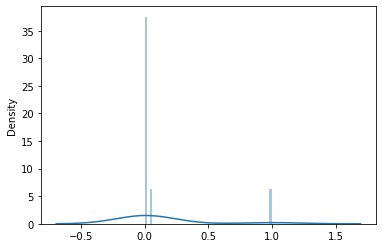

In [36]:
sns.distplot(x_normalized[2])
plt.show()

# Encode Categorical Data

In [37]:
#drop columns that are not useful
cat = categorical.drop(['policy'], axis=1)
cat
#pd.get_dummies(X_cat)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [38]:
#checking values in each column, review for encoding process
for i in cat.select_dtypes(np.object).columns:
    print(cat[i].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [39]:
#split tables for encoding processes
ohe_resp = cat.filter(items=['response'])
ohe_gend = cat.filter(items=['gender'])
ohe_data = cat.filter(items=['response','gender'])
le_data = cat.filter(items=['education','location_code','marital_status','renew_offer_type','sales_channel','vehicle_class','vehicle_size'])
ord_data = cat.filter(items=['coverage','employmentstatus'])

# One Hot Encoding

In [40]:
pd.get_dummies(ohe_data)

,response_No,response_Yes,gender_F,gender_M
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
9129,1,0,0,1
9130,0,1,1,0
9131,1,0,0,1
9132,1,0,0,1


In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(ohe_data)
# encoder.categories
ohe_encoded = encoder.transform(ohe_data).toarray()
ohe_encoded

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [42]:
type(ohe_encoded)
pd.DataFrame(ohe_encoded)
pd.concat([pd.DataFrame(x_normalized), pd.DataFrame(ohe_encoded)],axis=1)

,0,1,2,3,4,5,6,7,0,1
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919,0.0,0.0
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512,0.0,0.0
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837,0.0,0.0
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395,0.0,1.0
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478,0.0,1.0
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198,1.0,0.0
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304,0.0,1.0
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323,0.0,1.0


In [43]:
X = np.concatenate((x_normalized, ohe_encoded), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.990067,0.024720,0.011464,0.001791,0.0,0.000358,0.137864,0.003919,0.0,0.0
1,0.987005,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0.001512,0.0,0.0
2,0.998995,0.008372,0.001395,0.002946,0.0,0.000155,0.043911,0.000837,0.0,0.0
3,0.997472,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.001395,0.0,1.0
4,0.998324,0.025901,0.004258,0.015612,0.0,0.000355,0.049010,0.003792,0.0,1.0


# Label Encoding

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le_data['education']=le.fit_transform(le_data['education'])
le_data['location_code']=le.fit_transform(le_data['location_code'])
le_data['marital_status']=le.fit_transform(le_data['marital_status'])
le_data['renew_offer_type']=le.fit_transform(le_data['renew_offer_type'])
le_data['sales_channel']=le.fit_transform(le_data['sales_channel'])
le_data['vehicle_class']=le.fit_transform(le_data['vehicle_class'])
le_data['vehicle_size']=le.fit_transform(le_data['vehicle_size'])
#check: 
#le_data['vehicle_size'].unique()

In [45]:
#Begin combining to normalized set
type(le)
pd.DataFrame(le_data)
pd.concat([pd.DataFrame(x_normalized), pd.DataFrame(le_data)],axis=1)


,0,1,2,3,4,5,6,7,education,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919,0,1,1,0,0,5,1
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512,0,1,2,2,0,0,1
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837,0,1,1,0,0,5,1
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395,0,1,1,0,2,3,1
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478,0,2,1,1,3,0,1
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198,1,1,0,0,1,0,1
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304,0,1,2,0,1,0,1
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323,1,1,1,2,1,0,0


In [46]:
X = np.concatenate((x_normalized, le_data), axis=1)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919,0.0,1.0,1.0,0.0,0.0,5.0,1.0
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512,0.0,1.0,2.0,2.0,0.0,0.0,1.0
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837,0.0,1.0,1.0,0.0,0.0,5.0,1.0
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395,0.0,1.0,1.0,0.0,2.0,3.0,1.0
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792,0.0,0.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478,0.0,2.0,1.0,1.0,3.0,0.0,1.0
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198,1.0,1.0,0.0,0.0,1.0,0.0,1.0
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304,0.0,1.0,2.0,0.0,1.0,0.0,1.0
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323,1.0,1.0,1.0,2.0,1.0,0.0,0.0


# Ordinal Encoding

In [47]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cat['coverage_code'] = ord_enc.fit_transform(cat[['coverage']])
cat_coverage = cat[['coverage_code']]
cat['employmentstatus_code'] = ord_enc.fit_transform(cat[['employmentstatus']])
cat_employment = cat[['employmentstatus_code']]
#check:
cat_employment

,employmentstatus_code
0,1.0
1,4.0
2,1.0
3,4.0
4,1.0
...,...
9129,1.0
9130,1.0
9131,4.0
9132,1.0


In [48]:
#Begin combining to normalized set > employment
type(ord_enc)
pd.DataFrame(cat_employment)
pd.concat([pd.DataFrame(X), pd.DataFrame(cat_employment)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,employmentstatus_code
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512,0.0,1.0,2.0,2.0,0.0,0.0,1.0,4.0
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395,0.0,1.0,1.0,0.0,2.0,3.0,1.0,4.0
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304,0.0,1.0,2.0,0.0,1.0,0.0,1.0,4.0
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0


In [49]:
X = np.concatenate((pd.DataFrame(X), cat_employment), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.990067,0.024720,0.011464,0.001791,0.0,0.000358,0.137864,0.003919,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0
1,0.987005,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0.001512,0.0,1.0,2.0,2.0,0.0,0.0,1.0,4.0
2,0.998995,0.008372,0.001395,0.002946,0.0,0.000155,0.043911,0.000837,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0
3,0.997472,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.001395,0.0,1.0,1.0,0.0,2.0,3.0,1.0,4.0
4,0.998324,0.025901,0.004258,0.015612,0.0,0.000355,0.049010,0.003792,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0


In [50]:
#Begin combining to normalized set > coverage
pd.DataFrame(cat_coverage)
pd.concat([pd.DataFrame(X), pd.DataFrame(cat_coverage)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,coverage_code
0,0.990067,0.024720,0.011464,0.001791,0.000000,0.000358,0.137864,0.003919,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0
1,0.987005,0.013293,0.001838,0.005939,0.000000,0.001131,0.160005,0.001512,0.0,1.0,2.0,2.0,0.0,0.0,1.0,4.0,1.0
2,0.998995,0.008372,0.001395,0.002946,0.000000,0.000155,0.043911,0.000837,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2.0
3,0.997472,0.013829,0.002348,0.008480,0.000000,0.000913,0.069128,0.001395,0.0,1.0,1.0,0.0,2.0,3.0,1.0,4.0,0.0
4,0.998324,0.025901,0.004258,0.015612,0.000000,0.000355,0.049010,0.003792,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.999952,0.003119,0.000769,0.003802,0.000000,0.000085,0.008469,0.000478,0.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0
9130,0.992212,0.025314,0.004486,0.008972,0.000000,0.000320,0.121507,0.003198,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
9131,0.995276,0.010363,0.001097,0.004511,0.000366,0.000244,0.096406,0.001304,0.0,1.0,2.0,0.0,1.0,0.0,1.0,4.0,1.0
9132,0.995716,0.012704,0.004499,0.000397,0.000000,0.000397,0.091467,0.001323,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0


In [51]:
X = np.concatenate((pd.DataFrame(X), cat_coverage), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.990067,0.024720,0.011464,0.001791,0.0,0.000358,0.137864,0.003919,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0
1,0.987005,0.013293,0.001838,0.005939,0.0,0.001131,0.160005,0.001512,0.0,1.0,2.0,2.0,0.0,0.0,1.0,4.0,1.0
2,0.998995,0.008372,0.001395,0.002946,0.0,0.000155,0.043911,0.000837,0.0,1.0,1.0,0.0,0.0,5.0,1.0,1.0,2.0
3,0.997472,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0.001395,0.0,1.0,1.0,0.0,2.0,3.0,1.0,4.0,0.0
4,0.998324,0.025901,0.004258,0.015612,0.0,0.000355,0.049010,0.003792,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0


# Split into train set and test set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [53]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.994536,0.014340,0.003530,0.004192,0.000000,0.000441,0.103249,0.001180,0.0,1.0,2.0,0.0,0.0,3.0,2.0,4.0,1.0
1,0.993302,0.009858,0.000513,0.002773,0.000000,0.000205,0.115084,0.001098,3.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,1.0
2,0.999812,0.012688,0.000883,0.004855,0.000000,0.000331,0.013788,0.001163,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0
3,0.997083,0.014776,0.001731,0.003328,0.000000,0.000532,0.074780,0.000712,0.0,1.0,2.0,0.0,1.0,1.0,1.0,4.0,1.0
4,0.999224,0.013235,0.000607,0.007650,0.000000,0.000364,0.036262,0.001299,4.0,2.0,1.0,2.0,3.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,0.999842,0.013653,0.002318,0.009918,0.000258,0.000386,0.004883,0.001298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
5476,0.999968,0.003198,0.000000,0.000516,0.000017,0.000034,0.007352,0.000190,0.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0
5477,0.997895,0.013060,0.004652,0.008945,0.000000,0.000716,0.062690,0.001666,2.0,1.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0
5478,0.991708,0.025991,0.007530,0.014574,0.000000,0.000243,0.124756,0.002442,0.0,1.0,1.0,0.0,2.0,4.0,0.0,2.0,0.0


# 05 - Modeling

In [54]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
residuals = predictions - y_test

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

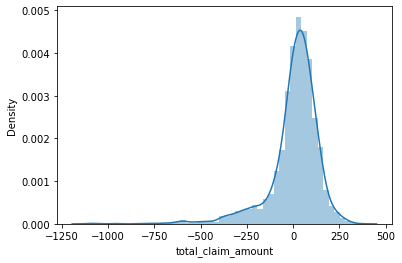

In [55]:
sns.distplot(residuals)

# 06 - Model Variation

In [56]:
mse = mean_squared_error(y_test, predictions)
print("MSE = " + str(mse))
#1st result = 50247.99 > this could improve (ideal = 0)
#2nd result = 37061.04
#3rd result = 19340.36

MSE = 19340.361517853875


In [57]:
rmse = math.sqrt(mse)
print("RMSE = " + str(rmse))
#1st result = 224.28 > this could improve
#2nd result = 192.51
#3rd result = 139.07

RMSE = 139.06962830846237


In [58]:
r2 = r2_score(y_test, predictions)
print("r2 = " + str(r2))
#1st result = 0.366 > this could improve (ideal = 1.0)
#2nd result = 0.533
#3rd result = 0.756

r2 = 0.7565808158307552


In [59]:
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print("Adjusted r2 = " + str(adj_r2))
#1st result = 0.363 > this could improve
#2nd result = 0.531
#3rd result = 0.755

Adjusted r2 = 0.7554427173349144


In [60]:
#4th result
#Optimized testing code for different variables: removing unnecessary columns from X_cat. Marital Status, Employment, Location Code, Sales Channel
X_cat1 = categorical.drop(['marital_status', 'employmentstatus', 'location_code', 'sales_channel'], axis=1)

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat1)
encoded = encoder.transform(X_cat1).toarray()

X = np.concatenate((x_normalized, encoded), axis=1)
y = y #set in prior code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Perform a regression
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)

#Calculate
mse = mean_squared_error(y_test, predictions) 
rmse = math.sqrt(mse) 
r2 = r2_score(y_test, predictions) #r^2
n = len(X_test) 
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))

#Print
print("MSE = " + str(mse))
print("RMSE = " + str(rmse))
print("r2 = " + str(r2))
print("Adjusted r2 = " + str(adj_r2))

MSE = 11474.56793226216
RMSE = 107.11940968966437
r2 = 0.856269686585498
Adjusted r2 = 0.8541403486089868


# 07 - Reporting

In [62]:
The 1st test was completed using all categorical variables excluding Customer column.
Using three processes for categorical encoding.
Income listed as 0 remained untouched.

Results provides the following: 
    - MSE: 50247.99
    - RMSE: 224.28 
    - R2: 0.366
    - R2_Adj: 0.363 
Summary: Reasonably low R2 and adjusted R2
    
The 2nd test was completed using some categorical variables excluding Customer & Effective_to_date columns, using three processes for categorical encoding
Using three processes for categorical encoding
Income listed as 0 remained untouched.
Results provides the following: 
    - MSE: 37061.04
    - RMSE: 192.51
    - R2: 0.533
    - R2_Adj:  0.531
Summary: Removing unrelated categorical data, results in a relatively fair R2 and adjusted R2
    
The 3rd test was completed using some categorical variables excluding Customer & Effective_to_date columns
Income data utilized was transformed utilizing log transformations and 0 replaced with mean.
Results provides the following: 
    - MSE: 19340.36
    - RMSE: 139.07
    - R2: 0.756
    - R2_Adj: 0.755
Summary: Tested the model by normalizing income data. The R2 increased by .22, showing an improvement to this model

The 4th test was completed using some categorical variables excluding Customer, Marital_status, Employment, Location_code, Sales_Channel
Using three processes for categorical encoding
Income data utilized was transformed utilizing log transformations and 0 replaced with mean.
Results provides the following: 
    - MSE: 11474.56
    - RMSE: 107.11
    - R2: 0.856
    - R2_Adj: 0.854
Summary:  By further removing unrelated categorical data, and building upon the previous model, R2 increase by .10, showing an improvement to this reiterated model


SyntaxError: invalid syntax (<ipython-input-62-9088b5f4d153>, line 1)